In [1]:
from __future__ import print_function
import ipywidgets as widgets
from IPython.display import display

import sys
!{sys.executable} -m pip install mysql-connector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mysql.connector
from datetime import date, datetime, timedelta
import dateutil.parser
import pylab as pla
import math


mydb = mysql.connector.connect(
  host="iiwari-mariadb-server",
  user="root",
  passwd="d41k4Duu",
  database="iiwari_org"
)

# Luodaan slideri, jolla voidaan valita päiväväli, joka syötetään SQL pyyntöön

In [2]:
start_date = datetime(2019, 3, 7)
end_date = datetime(2020, 1, 23)

dates = pd.date_range(start_date, end_date, freq='D')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '1000px'}
)

selection_range_slider

SelectionRangeSlider(description='Dates', index=(0, 322), layout=Layout(width='1000px'), options=((' 07 Mar 20…

In [3]:
first_day = 0
last_day = 0
def print_date_range(date_range):
    global first_day
    global last_day
    #print(date_range)
    days = date_range
    print(days)
    first_day = days[0]
    last_day = days[-1]

widgets.interact(
    print_date_range,
    date_range=selection_range_slider
);

interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 322), layout=Layout(width='1000px'),…

In [4]:
first_day = str(first_day)
first_day = first_day + ".000000+00:00"

last_day = str(last_day)
last_day = last_day.strip("'00:00:00'")
last_day = last_day + " 23:59:59.000000+00:00"

print("Aloituspäivä: ", first_day,"\nLopetuspäivä: ", last_day)

Aloituspäivä:  2019-03-07 00:00:00.000000+00:00 
Lopetuspäivä:  2019-03-10  23:59:59.000000+00:00


In [5]:
a = first_day
b = last_day
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > %s AND timestamp < %s AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 ", (a,b));
#mycursor.execute("SELECT node_id, x, y, COUNT(node_id), timestamp FROM SensorData WHERE timestamp > '2019-01-01 13:05:08.078133+00:00' AND timestamp < '2019-01-03 13:05:08.078133+00:00' GROUP BY node_id ");
database = pd.DataFrame(mycursor.fetchall())
print(database)

       node_id                            timestamp     x     y  z   q
0        51719   b'2019-03-07 13:05:32.07806+00:00'  2101  5000  0  85
1        51719   b'2019-03-07 13:05:35.07808+00:00'  3041  5000  0  46
2        51719  b'2019-03-07 13:05:36.077925+00:00'  3297  5000  0  85
3        51719  b'2019-03-07 13:05:37.078493+00:00'  3517  5000  0  97
4        51719  b'2019-03-07 13:05:41.077938+00:00'  4063  5000  0  74
...        ...                                  ...   ...   ... ..  ..
15760    51719  b'2019-03-08 13:35:04.468129+00:00'    39  1315  0  77
15761    51719  b'2019-03-08 13:35:05.468611+00:00'    37  1314  0  85
15762    51719  b'2019-03-08 13:35:06.468181+00:00'    50  1313  0  72
15763    51719  b'2019-03-08 13:35:07.468547+00:00'    51  1320  0  71
15764    51719  b'2019-03-08 13:35:08.468713+00:00'    22  1325  0  78

[15765 rows x 6 columns]


In [ ]:
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-10-01 00:00:00.000000+00:00' AND timestamp < '2019-10-02 00:00:00.000000+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 ");
#mycursor.execute("SELECT node_id, x, y, COUNT(node_id), timestamp FROM SensorData WHERE timestamp > '2019-06-01 13:05:08.078133+00:00' AND timestamp < '2019-06-11 13:05:08.078133+00:00' GROUP BY node_id ");
database = pd.DataFrame(mycursor.fetchall())

In [6]:
print(database)

       node_id                            timestamp     x     y  z   q
0        51719   b'2019-03-07 13:05:32.07806+00:00'  2101  5000  0  85
1        51719   b'2019-03-07 13:05:35.07808+00:00'  3041  5000  0  46
2        51719  b'2019-03-07 13:05:36.077925+00:00'  3297  5000  0  85
3        51719  b'2019-03-07 13:05:37.078493+00:00'  3517  5000  0  97
4        51719  b'2019-03-07 13:05:41.077938+00:00'  4063  5000  0  74
...        ...                                  ...   ...   ... ..  ..
15760    51719  b'2019-03-08 13:35:04.468129+00:00'    39  1315  0  77
15761    51719  b'2019-03-08 13:35:05.468611+00:00'    37  1314  0  85
15762    51719  b'2019-03-08 13:35:06.468181+00:00'    50  1313  0  72
15763    51719  b'2019-03-08 13:35:07.468547+00:00'    51  1320  0  71
15764    51719  b'2019-03-08 13:35:08.468713+00:00'    22  1325  0  78

[15765 rows x 6 columns]


# Rajataan aluetta (latausasemat yms)

In [7]:
 # talon rajoja
database = database[database.y > -1]
database = database[database.y < 10407]
database = database[database.x < 10100]
database = database[database.x > 240]
database = database[database.q < 100]#signaali

# Latausasemat pois
database = database.drop(database[(database.x < 1850.0) & (database.y > 3000)].index)
# Oikea ylänurkka pois
database = database.drop(database[(database.x > 8200) & (database.y < 250)].index)
# tuloaula - ei vissiin toimi tracking siellä hyvin
database = database.drop(database[(database.x < 1000) & (database.y > 2500)].index)
print(database)

       node_id                            timestamp     x     y  z   q
0        51719   b'2019-03-07 13:05:32.07806+00:00'  2101  5000  0  85
1        51719   b'2019-03-07 13:05:35.07808+00:00'  3041  5000  0  46
2        51719  b'2019-03-07 13:05:36.077925+00:00'  3297  5000  0  85
3        51719  b'2019-03-07 13:05:37.078493+00:00'  3517  5000  0  97
4        51719  b'2019-03-07 13:05:41.077938+00:00'  4063  5000  0  74
...        ...                                  ...   ...   ... ..  ..
15678    51719  b'2019-03-08 13:33:37.468404+00:00'   243  1390  0  63
15684    51719  b'2019-03-08 13:33:43.468591+00:00'   247  1345  0  64
15685    51719  b'2019-03-08 13:33:44.468112+00:00'   256  1350  0  71
15686    51719  b'2019-03-08 13:33:45.468475+00:00'   247  1359  0  59
15687    51719  b'2019-03-08 13:33:46.468576+00:00'   244  1360  0  62

[5174 rows x 6 columns]


In [8]:
#database = database.drop(database[(database.x < 1850.0) & (database.y > 3000.0)].index) # Poistetaan latausasemien lähellä olevat koordinaattipisteet
#database = database.drop(database[(database.x > 9000.0)].index)

database_alkup_koko = database.size
database_muokattu_koko = database.size

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table = pd.DataFrame(columns=list('ntxyzq'))
table.n = database.node_id
table.t = database.timestamp
table.x = database.x
table.y = database.y
table.z = database.z
table.q = database.q


table['t'] = table['t'].astype(str)
table['t'] = table['t'].str.slice(2, -7)

table['t'] = table['t'].astype('datetime64[ns]')
table['t'] = pd.Series(table['t']).dt.round("S")
table['t'] = table['t'].dt.date

table['t'] = pd.to_datetime(table['t'], errors='coerce')

#table['T'] = pd.to_datetime(table['T'], errors='coerce')
#table['T'] = table['T'].dt.normalize()

print(table)

           n          t     x     y  z   q
0      51719 2019-03-07  2101  5000  0  85
1      51719 2019-03-07  3041  5000  0  46
2      51719 2019-03-07  3297  5000  0  85
3      51719 2019-03-07  3517  5000  0  97
4      51719 2019-03-07  4063  5000  0  74
...      ...        ...   ...   ... ..  ..
15678  51719 2019-03-08   243  1390  0  63
15684  51719 2019-03-08   247  1345  0  64
15685  51719 2019-03-08   256  1350  0  71
15686  51719 2019-03-08   247  1359  0  59
15687  51719 2019-03-08   244  1360  0  62

[5174 rows x 6 columns]


# Poistetaan liiat nopeudet

In [9]:
table_alkuperäinen = len(table['x'])

In [10]:
prev = 0
val = 0
def calc_velocity(time_start, time_end):
    diff_time = np.datetime64(time_start) - np.datetime64(time_end)
    diff_time.item().total_seconds()
    diff_time = diff_time / np.timedelta64(1, 's')
    if(diff_time > 0.1):
        return diff_time
    else:
        return 0.1
x = 0
for i in range(len(table['x'])):
    if(i < len(table['x'])):
        value1 = calc_velocity(table.iloc[i-x, 1], table.iloc[i-(1+x), 1])
        value2 = int((abs(table.iloc[i-x, 2])) - prev)
        val =  value2 / value1
        if (val > 60 or value2 > 100):
            table.drop([table.index[i-x]], axis = 0, inplace = True)
            prev = abs(table.iloc[i-x, 2])
            x +=1
        else:
            prev = abs(table.iloc[i-x, 2])
x = 0
for i in range(len(table['y'])):
    if(i < len(table['x'])):
        value1 = calc_velocity(table.iloc[i-x, 1], table.iloc[i-(1+x), 1])
        value2 = int((abs(table.iloc[i-x, 3]))-prev)
        val = value2 / value1    
        if (val > 60 or value2 > 100):
            table.drop([table.index[i-x]], axis = 0, inplace = True)
            prev = abs(table.iloc[i-x , 3])
            x +=1
        else:
            prev = abs(table.iloc[i-x, 3])
        
print(len(table['x']))
print("Poistettuja pisteitä: ", table_alkuperäinen - len(table['x']))

4017
Poistettuja pisteitä:  1157


In [11]:
def calc_velocity1(time_start, time_end, ):
    diff_time = np.datetime64(time_start) - np.datetime64(time_end)
    diff_time.item().total_seconds()
    diff_time = diff_time / np.timedelta64(1, 's')
    if(diff_time > 0.1):
        return diff_time
    else:
        return 0.1
x = 0
import math  
def calculateDistance(x1,y1,x2,y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist  
devx1 = []
time = []
dist = []
speed = []
i = 1
for i in range(len(table['x'])):
    time.append(calc_velocity1(table.iloc[i, 1], table.iloc[i-1, 1]))
    dist.append(calculateDistance(abs(table.iloc[i, 2]), abs(table.iloc[i, 3]),abs(table.iloc[i-1, 2]),  abs(table.iloc[i-1, 3])))
speed = []
for i in range(len(dist)):
    speed.append((dist[i] / 93)/time[i])
x = 0
for i in speed:
    if(i > 2 or (dist[x]/93) > 100):
        table.drop([table.index[x]], axis = 0, inplace = True)
        x -= 1
    x += 1
print(len(table['x']))
print("Poistettuja pisteitä: ", table_alkuperäinen - len(table['x']))

3009
Poistettuja pisteitä:  2165


# Erotellaan kaupassa käynnit toisistaan

In [12]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
tripEnd =[] 
tripStart = []
print(tripEnd)
started = False
ended = True
bol = False
for i in range(len(table)):
    if((table.loc[table.index[i], 'x'] > -800.0) & (table.loc[table.index[i],'x'] < 700) & (table.loc[table.index[i],'y'] > 0.0) & (table.loc[table.index[i],'y'] < 2199) &  started & (not ended)):
        tripEnd.append(i)
        #print(started)
        started = False
        ended = True
        #print("end")
    elif(((table.loc[table.index[i], 'x'] > -800.0) & (table.loc[table.index[i],'x'] < 700) & (table.loc[table.index[i],'y'] > 2200) & (table.loc[table.index[i],'y'] < 3100)) & (not started) & ended):
        #print(started)
        tripStart.append(i)
        started = True
        ended = False
        

print(tripEnd)
print(tripStart)

[]
[]
[]


# Tulostetaan kaupassa käynnit eri väreillä

n             int64
t    datetime64[ns]
x             int64
y             int64
z             int64
q             int64
dtype: object
-1


ZeroDivisionError: division by zero

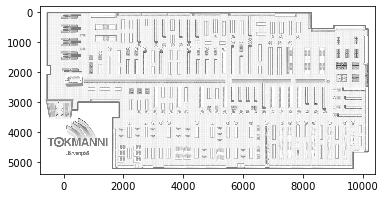

In [13]:
from termcolor import colored

img = plt.imread("pic.png")
fig, ax = plt.subplots()
prev = 0
ax.imshow(img, extent=[-800, 10400, 5400, -200])
#print(tripEnd)
x = 0
result = []
col = ['red','green','yellow','blue','magenta','cyan']
cols = []
print(table.dtypes)
print(len(tripEnd) -1)
length = len(tripEnd) -1
prevs = 0
for j in range(length):
    #print(j)
    index = tripStart[j-x]
    index2 = tripEnd[j-x]
    #print(data.iloc[index, 1] - data.iloc[index2, 1])
    res = calc_velocity(table.iloc[index2, 1], table.iloc[index, 1]) / 60
    if(res > 200):
        del tripEnd[j-x]
        del tripStart[j-x]
        x += 1
    else:
        result.append(res)
        colr = np.random.randint(0,6)
        if(colr == prevs):
            colr = np.random.randint(0,6)
        else:
            pass
        cols.append(colr)
        #col.append(colr)
        #print(col)
        print(colr)
        ax.plot(table.loc[tripStart[j]:tripEnd[j],'x'],table.loc[tripStart[j]:tripEnd[j],'y'] , linewidth=1, color=col[colr])
        prevs = colr
for i in range(len(result)):
    print(colored(result[i], col[cols[i]]))


def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg
print("Average time spent in store ", cal_average(result))
print("Slowest took ", max(result), " minutes")
print("Sonic took ", min(result), " minutes")

In [14]:
import ipywidgets as widgets
from IPython.display import display

start_date2 = []
end_date2 = []

class DateRangePicker(object):
    def __init__(self,start,end,freq='D',fmt='%Y-%m-%d'):
        """
        Parameters
        ----------
        start : string or datetime-like
            Left bound of the period
        end : string or datetime-like
            Left bound of the period
        freq : string or pandas.DateOffset, default='D'
            Frequency strings can have multiples, e.g. '5H' 
        fmt : string, defauly = '%Y-%m-%d'
            Format to use to display the selected period

        """
        self.date_range=pd.date_range(start=start,end=end,freq=freq)
        options = [(item.strftime(fmt),item) for item in self.date_range]
        self.slider_start = widgets.SelectionSlider(
            description='start date',
            options=options,
            continuous_update=False
        )
        self.slider_end = widgets.SelectionSlider(
            description='end date',
            options=options,
            continuous_update=False,
            value=options[-1][1]
        )

        self.slider_start.on_trait_change(self.slider_start_changed, 'value')
        self.slider_end.on_trait_change(self.slider_end_changed, 'value')

        self.widget = widgets.Box(children=[self.slider_start,self.slider_end])

    def slider_start_changed(self,key,value):
        self.slider_end.value=max(self.slider_start.value,self.slider_end.value)
        self._observe(start=self.slider_start.value,end=self.slider_end.value)

    def slider_end_changed(self,key,value):
        self.slider_start.value=min(self.slider_start.value,self.slider_end.value)
        self._observe(start=self.slider_start.value,end=self.slider_end.value)

    def display(self):
        display(self.slider_start,self.slider_end)

    def _observe(self,**kwargs):
        if hasattr(self,'observe'):
            self.observe(**kwargs)

def fct(start,end):
    print (start,end)

In [15]:
from datetime import date, timedelta
d = 0
dates = []

times = table['t'].tolist()
start_date = times[0]
end_date = times[-1]

day = widgets.IntSlider(value=5, min=0, max=10, step=1, description="Date:")
def square(number):
    return number*number
widgets.interact(square, number=day)


w=DateRangePicker(start=times[0],end=times[-1],freq='D', fmt='%Y-%m-%d')#,fmt='%Y-%m-%d'
w.observe=fct
w.display()

interactive(children=(IntSlider(value=5, description='Date:', max=10), Output()), _dom_classes=('widget-intera…

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: on_trait_change is deprecated in traitlets 4.1: use observe instead
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: on_trait_change is deprecated in traitlets 4.1: use observe instead


SelectionSlider(continuous_update=False, description='start date', options=(('2019-03-07', Timestamp('2019-03-…

SelectionSlider(continuous_update=False, description='end date', index=1, options=(('2019-03-07', Timestamp('2…

In [16]:
import ipywidgets as widgets
import pandas as pd
from datetime import datetime

times = table['t'].tolist()
start_date = times[0]
end_date = times[-1]

dates = pd.date_range(start_date, end_date)#freq='D'

#dates = [datetime.date(2015, i, 1) for i in range(1, 13)]
#options = [(i.strftime('%b'), i) for i in dates]

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

#selection_range_slider

In [17]:
def print_date_range(date_range):
    #''.join((date_range))
    #date_range = datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S') 
    print(date_range)

widgets.interact(
    print_date_range,
    date_range=selection_range_slider
);

interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 1), layout=Layout(width='500px'), op…

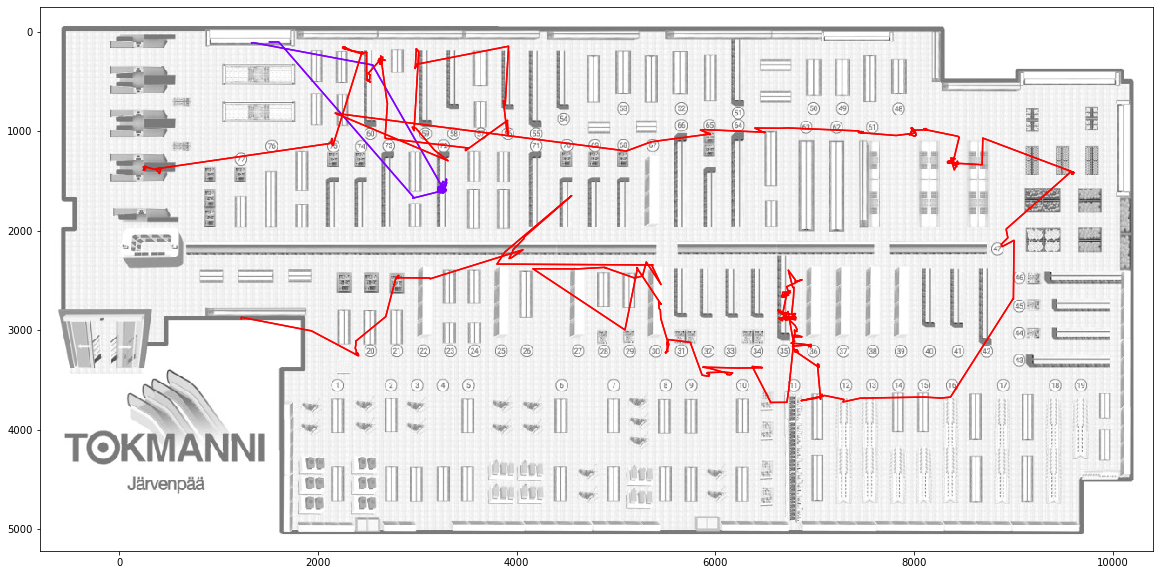

In [20]:
from matplotlib.pyplot import cm
from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

x = table['x'].tolist()
y = table['y'].tolist()
    
    
n = len(dates)
colors=iter(cm.rainbow(np.linspace(0,1,n)))


plt.rcParams['figure.figsize'] = 20, 10
img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-800, 10400, 5220, -250])

#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'c', 'm','lime', 'b', 'darkorange', 'g'])))
for i in dates:
    tsT = table.loc[table['t'] == i, :]
    c=next(colors)
    for i in range(n):
        plt.plot(tsT.x, tsT.y, color=c)

plt.show()

# Piirtää kärryn liikeet

In [ ]:
plt.clf()
img = plt.imread("pic.png")
plt.rcParams['figure.figsize'] = 20, 10
fig, ax = plt.subplots()
ax.imshow(img, extent=[-800, 10400, 5400, -200])
ax.plot(table['x'], table['y'] , 'o', linewidth=0.2, color='firebrick')
plt.show()

# Heatmap

In [ ]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm

x = table['x'].tolist()
y = table['y'].tolist()

def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    return heatmap.T, extent

extent=[-800, 10400, 5220, -250]
img2 = img
fig, axs = plt.subplots(2, 2)

sigmas = [0, 16, 32, 64]
for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.invert_yaxis()
        ax.plot(x, y, 'o', linewidth=0.2, markersize=3)
    else:
        img2, extent = myplot(x, y, s)
        ax.imshow(np.flipud(img2), extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()

# Luodaan IPywidgetsin avulla graafinen käyttöliittymä

In [ ]:
import matplotlib.pyplot as plt
import datetime
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
ulostulo = widgets.Output()

@interact
def nayta_arvot_yli(column1='x', x = 5000, column2='y', y = 2500, column3='timestamp', timestamp='2019-07-07 13:05:08.078133+00:00'):
    def kasittele_tapahtuma(muutos):
        ulostulo.clear_output(wait=True)
        with ulostulo:
            #if muutos['type'] == 'change' and muutos['name'] == 'value':
                #print("changed to %s" % muutos['new'])
            
            #x = np.array([df.drop(df[(df.x < x)].index).x])
            #y = np.array([df.drop(df[(df.y < y)].index).y])
            if muutos['new'] == 'x': # Valitaan alasvetovalikosta x-akseli
                
                # Valitaan halutut koordinaatit x:n arvon perusteella ja tehdään niistä Numpy-taulukko.
                x1 = np.array([table.loc[table[column1] > x].x])
                y1 = np.array([table.loc[table[column1] > x].y])
                
                # Plotataan kuva.
                img = plt.imread("pic.png")
                plt.rcParams['figure.figsize'] = 10, 5
                fig, ax = plt.subplots()
                ax.imshow(img, extent=[-800, 10400, 5400, -200])
                ax.plot(x1, y1, 'o') # linewidth=1, color='firebrick'
                plt.show()
                
            elif muutos['new'] == 'y': # Valitaan alasvetovalikosta y-akseli
                # Valitaan halutut koordinaatit y:n arvon perusteella ja tehdään niistä Numpy-taulukko.
                y2 = np.array([table.loc[table[column2] > y].y])
                x2 = np.array([table.loc[table[column2] > y].x])
                
                # Plotataan kuva.
                img = plt.imread("pic.png")
                plt.rcParams['figure.figsize'] = 10, 5
                fig, ax = plt.subplots()
                ax.imshow(img, extent=[-800, 10400, 5400, -200])
                ax.plot(x2, y2, 'o')
                plt.show()
                
            elif muutos['new'] == 'timestamp': # Valitaan alasvetovalikosta aikaleima
                # Tässä yritetään samaa kuin x- ja y-koordinaattien kohdalla, mutta se ei vielä onnistu.
                aika = table.loc[int(table[column3].to_timestamp) > timestamp]
                x3 = np.array([aika.item().total_seconds() > timestamp.item().total_seconds().x])
                y3 = np.array([aika.item().total_seconds() > timestamp.item().total_seconds().y])
                
                # Plotataan kuva.
                img = plt.imread("pic.png")
                plt.rcParams['figure.figsize'] = 10, 5
                fig, ax = plt.subplots()
                ax.imshow(img, extent=[-800, 10400, 5400, -200])
                ax.plot(x3, y3, 'o')
                plt.show()
        
            #print(x1.size)
            #print(y1.size)
            #return (x1, y1)
        
    valitse_akseli = widgets.Dropdown(
        options=['x', 'y', 'timestamp'],
        value=None,
        description='Akseli:',
    )
    valitse_akseli.observe(kasittele_tapahtuma) # Kiinnitetään tapahtumakäsittelijö alasvetovalikkoon.
    
    # Tehdään alasvetovalikko ja siitä tehtävän valinnan tuloksena piirtyvä kuva näkyviksi.
    display(valitse_akseli)
    display(ulostulo)

In [ ]:
times = table['t'].tolist()
start_date = times[0]
end_date = times[-1]

dates = pd.date_range(start_date, end_date)#freq='D'

#dates = [datetime.date(2015, i, 1) for i in range(1, 13)]
#options = [(i.strftime('%b'), i) for i in dates]

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

#selection_range_slider

In [ ]:
import matplotlib.pyplot as plt

    # Kärryt per tunti
#df['node_id'].value_counts().mul(1/3600).plot(kind='bar');

    # Kärryjen prosenttiosuus
df['node_id'].value_counts(normalize=True).mul(100).plot(kind='bar');

    # Kärryn id
plt.xlabel("Kärryn id", labelpad=14)

    # Pystyakselin teksti
plt.ylabel("Osuus kokonaismäärästä (%)", labelpad=14)

    # Otsikko
plt.title("Kärryjen esiintymistiheys " + str(df.timestamp.dt.date.iloc[0]) + " - " + str(df.timestamp.dt.date.iloc[-1]), y=1.02);